# Pyber

#### Trend analysis
Given fake data on share rides over 3 types of cities (Urban, Suburban, and Rural), analyze the data to detect any patterns or trends. Observations include:
- Overall the urban cities overall have higher number of rides than suburban and rural.
- Urban cities count with more drivers overall.
- Rural cities score higher fares on average.
- Suburban cities average the same as urban cities but with fewer rides.

In [26]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import os

In [27]:
# Import our data into pandas from CSV
csvcity = os.path.join('raw_data', 'city_data.csv')
csvride = os.path.join('raw_data', 'ride_data.csv')
city_df = pd.read_csv(csvcity)
ride_df = pd.read_csv(csvride)

In [28]:
combined_df = pd.merge(city_df, ride_df,how='outer',on='city')

#### Key Variables


- Average Fare ($) Per City
- Total Number of Rides Per City
- Total Number of Drivers Per City
- City Type (Urban, Suburban, Rural)

In [29]:
byCity = combined_df.groupby('city')
percityavg = byCity['fare'].mean()
perridetotal = byCity['ride_id'].count()
percitydrivers = byCity['driver_count'].unique()
percitydrivers = [x[0] for x in percitydrivers]
percitytype = byCity['type'].unique().map("%s".join)

In [30]:
city_stats = {'Avg Fare':percityavg,
              'Total Rides':perridetotal,
              'Drivers Total':percitydrivers,
             'Type':percitytype}
city_stats_df = pd.DataFrame(city_stats)
city_stats_df.head()

,Avg Fare,Drivers Total,Total Rides,Type
city,,,,
Alvarezhaven,23.928710,21,31,Urban
Alyssaberg,20.609615,67,26,Urban
Anitamouth,37.315556,16,9,Suburban
Antoniomouth,23.625000,21,22,Urban
Aprilchester,21.981579,49,19,Urban


In [31]:
urban = city_stats_df.loc[city_stats_df['Type']=='Urban',:]
suburban = city_stats_df.loc[city_stats_df['Type']=='Suburban',:]
rural = city_stats_df.loc[city_stats_df['Type']=='Rural',:]

fig = plt.figure(figsize=(10, 10))
ax=fig.add_subplot(111)

size_u = [x*10 for x in urban['Drivers Total']]
size_s = [x*10 for x in suburban['Drivers Total']]
size_r = [x*10 for x in rural['Drivers Total']]

#create scatter plots from the dataframes
ax.scatter(urban['Total Rides'],urban['Avg Fare'], 
            edgecolor='black',alpha=0.25, s=size_u, 
            c='r', label='Urban')
ax.scatter(suburban['Total Rides'],suburban['Avg Fare'], 
            edgecolor='black',alpha=0.25,
            c='b', s=size_s,label='Suburban')
ax.scatter(rural['Total Rides'],rural['Avg Fare'], s=size_r, 
            edgecolor='black',alpha=0.25,
            c='g', label='Rural')

plt.title('Pyber Ride sharing data')
plt.xlabel('Total Number of Rides')
plt.ylabel('Average Fare per city')
plt.legend(loc='best')


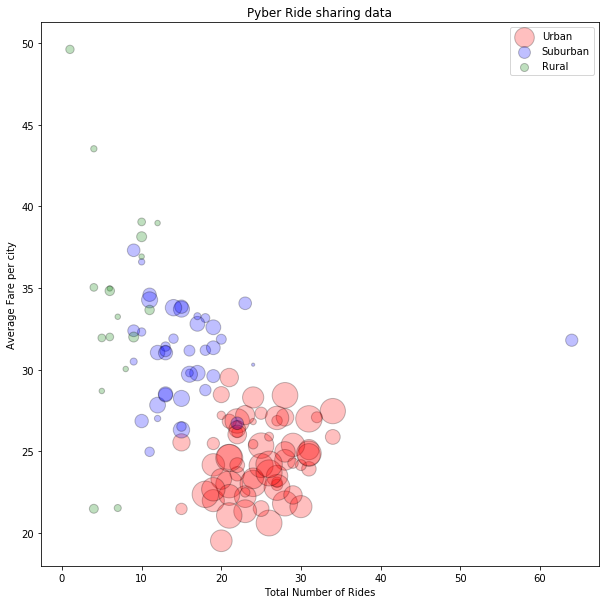

In [32]:
plt.show()

### Total Fare by city type

              fare
type              
Rural      4255.09
Suburban  20335.69
Urban     40078.34


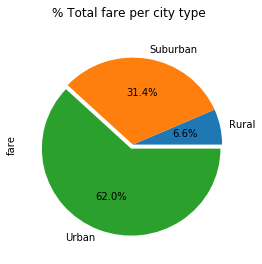

In [33]:
fares_df = pd.DataFrame(combined_df.groupby('type')['fare'].sum())
print(fares_df)
explode = (0,0,0.05)
fares_df.plot(kind='pie',autopct="%1.1f%%",explode=explode,subplots=True,figsize=(4,4),legend=False,title="% Total fare per city type")
plt.show()

### Total Rides by City

          ride_id
type             
Rural         125
Suburban      657
Urban        1625


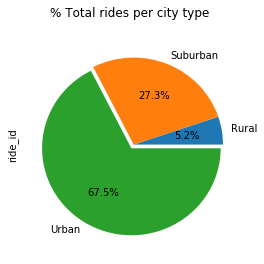

In [34]:
rides_df = pd.DataFrame(combined_df.groupby('type')['ride_id'].count())
print(rides_df.head())
explode = (0,0,0.05)
rides_df.plot(kind='pie',explode=explode,autopct="%1.1f%%",subplots=True,figsize=(4,4),legend=False,title='% Total rides per city type')
plt.show()

### Total drivers per city type

          driver_count
type                  
Rural               10
Suburban            27
Urban               73


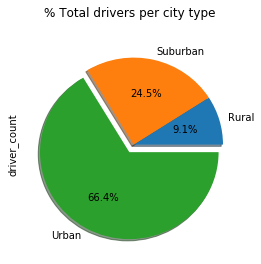

In [35]:
drivers_df = pd.DataFrame(combined_df.groupby('type')['driver_count'].max())
print(drivers_df.head())
explode=(0,0,0.1)
drivers_df.plot(kind='pie',explode=explode,shadow=True,autopct="%1.1f%%",subplots=True,figsize=(4,4),legend=False,title='% Total drivers per city type')
plt.show()